# Diffuse relfectance spectroscopy for age grading

This is a script to perform preprocessing and age grading from IR data from mosquito legs using diffuse reflectance spectroscopy.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
## library
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import seaborn as sn

sys.path.append('/Users/mauropazmino/Documents/chapter_2/src')
from preprocessing import baseline_gridsearch
from preprocessing import prepo_results_windows
from preprocessing import final_df_preprocessing
from preprocessing import boxplot_preprocessing

from preprocessing import baseline_gridsearch_MSC
from preprocessing import baseline_gridsearch_RNV
from preprocessing import baseline_gridsearch_SNV

from optimization import model_optimization_LR

from evaluation import model_evaluation


In [131]:
#load data
#X = pd.read_csv("/Users/mauro/Documents/Github/chapter_2/chapter_2/data/processed/X_age.csv")
#y = pd.read_csv("/Users/mauro/Documents/Github/chapter_2/chapter_2/data/processed/y_age.csv")

X = pd.read_csv("/Users/mauropazmino/Documents/chapter_2/data/processed/X_age.csv")
y_abrev = pd.read_csv("/Users/mauropazmino/Documents/chapter_2/data/processed/y_age.csv")

In [132]:
replace_values = {'03D' : "3 days old", '10D' : "10 days old"}                                                                                          
y = y_abrev.replace({"Age": replace_values})

In [133]:
# binary labels
lb = LabelBinarizer()
y_encoded = lb.fit_transform(y)

In [134]:
# train test split
seed = 7
seed_2 = 9
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y_encoded, test_size=0.2,stratify=y,random_state=seed_2)

## Baseline perfomance of different ML algoritms with different preprocessing methods

I calculate the baseline perfomance of various ML models with different preprocessing methods and smoothing windows: RNV, SNV, MSC and standard scaler

In [103]:
# define the windows for savgol smoothing
windows=[9,11,21]

In [106]:
# raw

total_zero_order = []
for i in windows: 
    scores = baseline_gridsearch(X_tr, y_tr,i,0)
    total_zero_order.append(scores)

total_first_order = []
for i in windows: 
    scores = baseline_gridsearch(X_tr, y_tr,i,1)
    total_first_order.append(scores)

total_second_order = []
for i in windows: 
    scores = baseline_gridsearch(X_tr, y_tr,i,2)
    total_second_order.append(scores)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [107]:
# SNV
snv_first_order = []
for i in windows: 
    scores = baseline_gridsearch_SNV(X_tr, y_tr,i,1)
    snv_first_order.append(scores)

snv_second_order = []
for i in windows: 
    scores = baseline_gridsearch_SNV(X_tr, y_tr,i,2)
    snv_second_order.append(scores)

snv_zero_order = []
for i in windows: 
    scores = baseline_gridsearch_SNV(X_tr, y_tr,i,0)
    snv_zero_order.append(scores)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [89]:
# RNV
rnv_zero_order = []
for i in windows: 
    scores = baseline_gridsearch_RNV(X_tr, y_tr,i,0)
    rnv_zero_order.append(scores)

rnv_first_order = []
for i in windows: 
    scores = baseline_gridsearch_RNV(X_tr, y_tr,i,1)
    rnv_first_order.append(scores)

rnv_second_order = []
for i in windows: 
    scores = baseline_gridsearch_RNV(X_tr, y_tr,i,2)
    rnv_second_order.append(scores)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [90]:
# MSC
msc_zero_order = []
for i in windows: 
    scores = baseline_gridsearch_MSC(X_tr, y_tr,i,0)
    msc_zero_order.append(scores)

msc_first_order = []
for i in windows: 
    scores = baseline_gridsearch_MSC(X_tr, y_tr,i,1)
    msc_first_order.append(scores)

msc_second_order = []
for i in windows: 
    scores = baseline_gridsearch_MSC(X_tr, y_tr,i,2)
    msc_second_order.append(scores)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [91]:
# Join the results for each preprocessing
raw_results = prepo_results_windows(total_zero_order, total_first_order, total_second_order,"raw")
snv_results = prepo_results_windows(snv_zero_order , snv_first_order, snv_second_order,"snv" )
rnv_results = prepo_results_windows(rnv_zero_order, rnv_first_order, rnv_first_order, "rnv")
msc_results = prepo_results_windows(msc_zero_order, msc_first_order, msc_second_order, "msc")

In [92]:
# concatenate all the preprocessing metdhos
dataframes = [raw_results, snv_results, rnv_results, msc_results]
df_concat = pd.concat(dataframes)

In [93]:
# change column names, tranform to long format and export to csv
preprocesing_final_results = final_df_preprocessing(df_concat)
preprocesing_final_results.to_csv("/Users/mauro/Documents/Github/chapter_2/chapter_2/results/preprocessing_baseline_age.csv")

In [94]:
preprocessing_results_df=preprocesing_final_results.groupby(["Model", "Preprocessing","Derivative", "Window"])["Accuracy"].mean().reset_index()
bestmodel = preprocessing_results_df.loc[preprocessing_results_df["Accuracy"].idxmax()]
print("Best model is:\n", bestmodel)

Best model is:
 Model                  LR
Preprocessing         raw
Derivative              0
Window                  9
Accuracy         0.765625
Name: 117, dtype: object


In [82]:
preprocessing_results_df.to_csv("/Users/mauro/Documents/Github/chapter_2/chapter_2/results/preprocessing_age_plot.csv", index=False)

In [83]:
preprocessing = pd.read_csv("/Users/mauro/Documents/Github/chapter_2/chapter_2/results/preprocessing_age_plot.csv")
preprocessing

,Model,Preprocessing,Derivative,Window,Accuracy
0,CART,msc,0,9,0.595313
1,CART,msc,0,11,0.571875
2,CART,msc,0,21,0.556250
3,CART,msc,1,9,0.546875
4,CART,msc,1,11,0.537500
...,...,...,...,...,...
283,SVC,snv,1,11,0.650000
284,SVC,snv,1,21,0.656250
285,SVC,snv,2,9,0.654687
286,SVC,snv,2,11,0.653125


In [92]:
#boxplot_preprocessing(preprocessing)
#plt.savefig("/Users/mauro/Documents/Github/chapter_2/chapter_2/plots/preprocessing_baseline_age.png", bbox_inches="tight",dpi=300)

In [105]:
preprocessing_results_df.loc[(preprocessing_results_df['Model'] == 'LR')]

,Model,Preprocessing,Derivative,Window,Accuracy
108,LR,msc,0,9,0.668750
109,LR,msc,0,11,0.668750
110,LR,msc,0,21,0.667188
111,LR,msc,1,9,0.623437
112,LR,msc,1,11,0.625000
113,LR,msc,1,21,0.628125
114,LR,msc,2,9,0.635938
115,LR,msc,2,11,0.645312
116,LR,msc,2,21,0.629687
117,LR,raw,0,9,0.739062


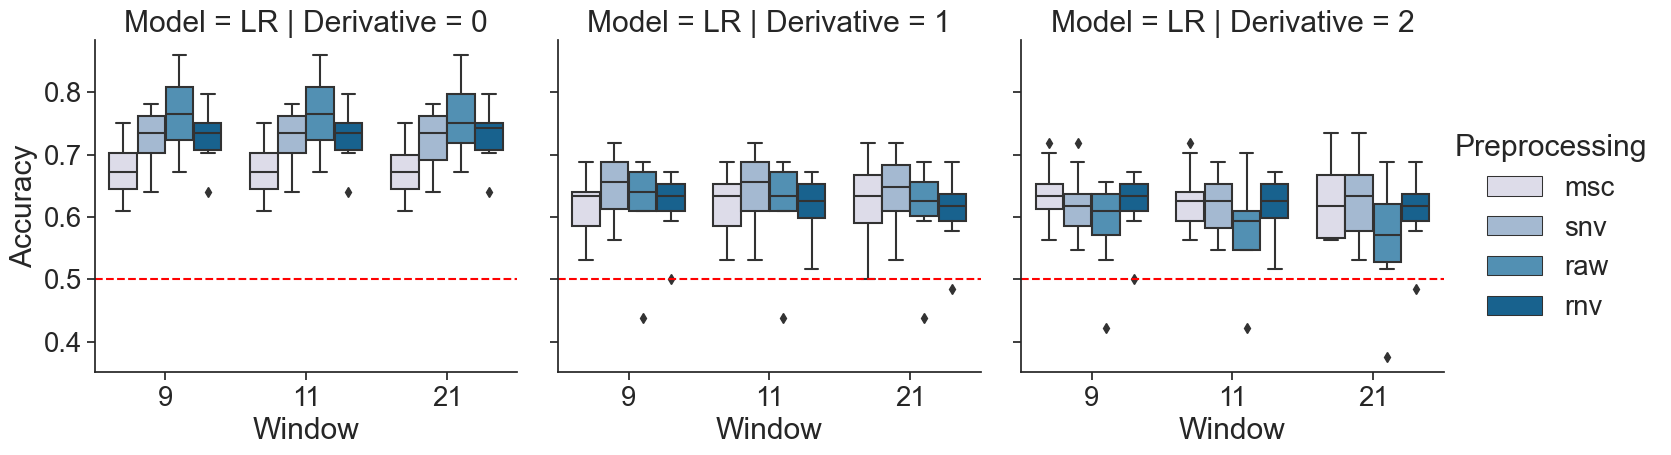

In [95]:
boxplot_preprocessing(preprocesing_final_results.loc[(preprocesing_final_results['Model'] == 'LR')])

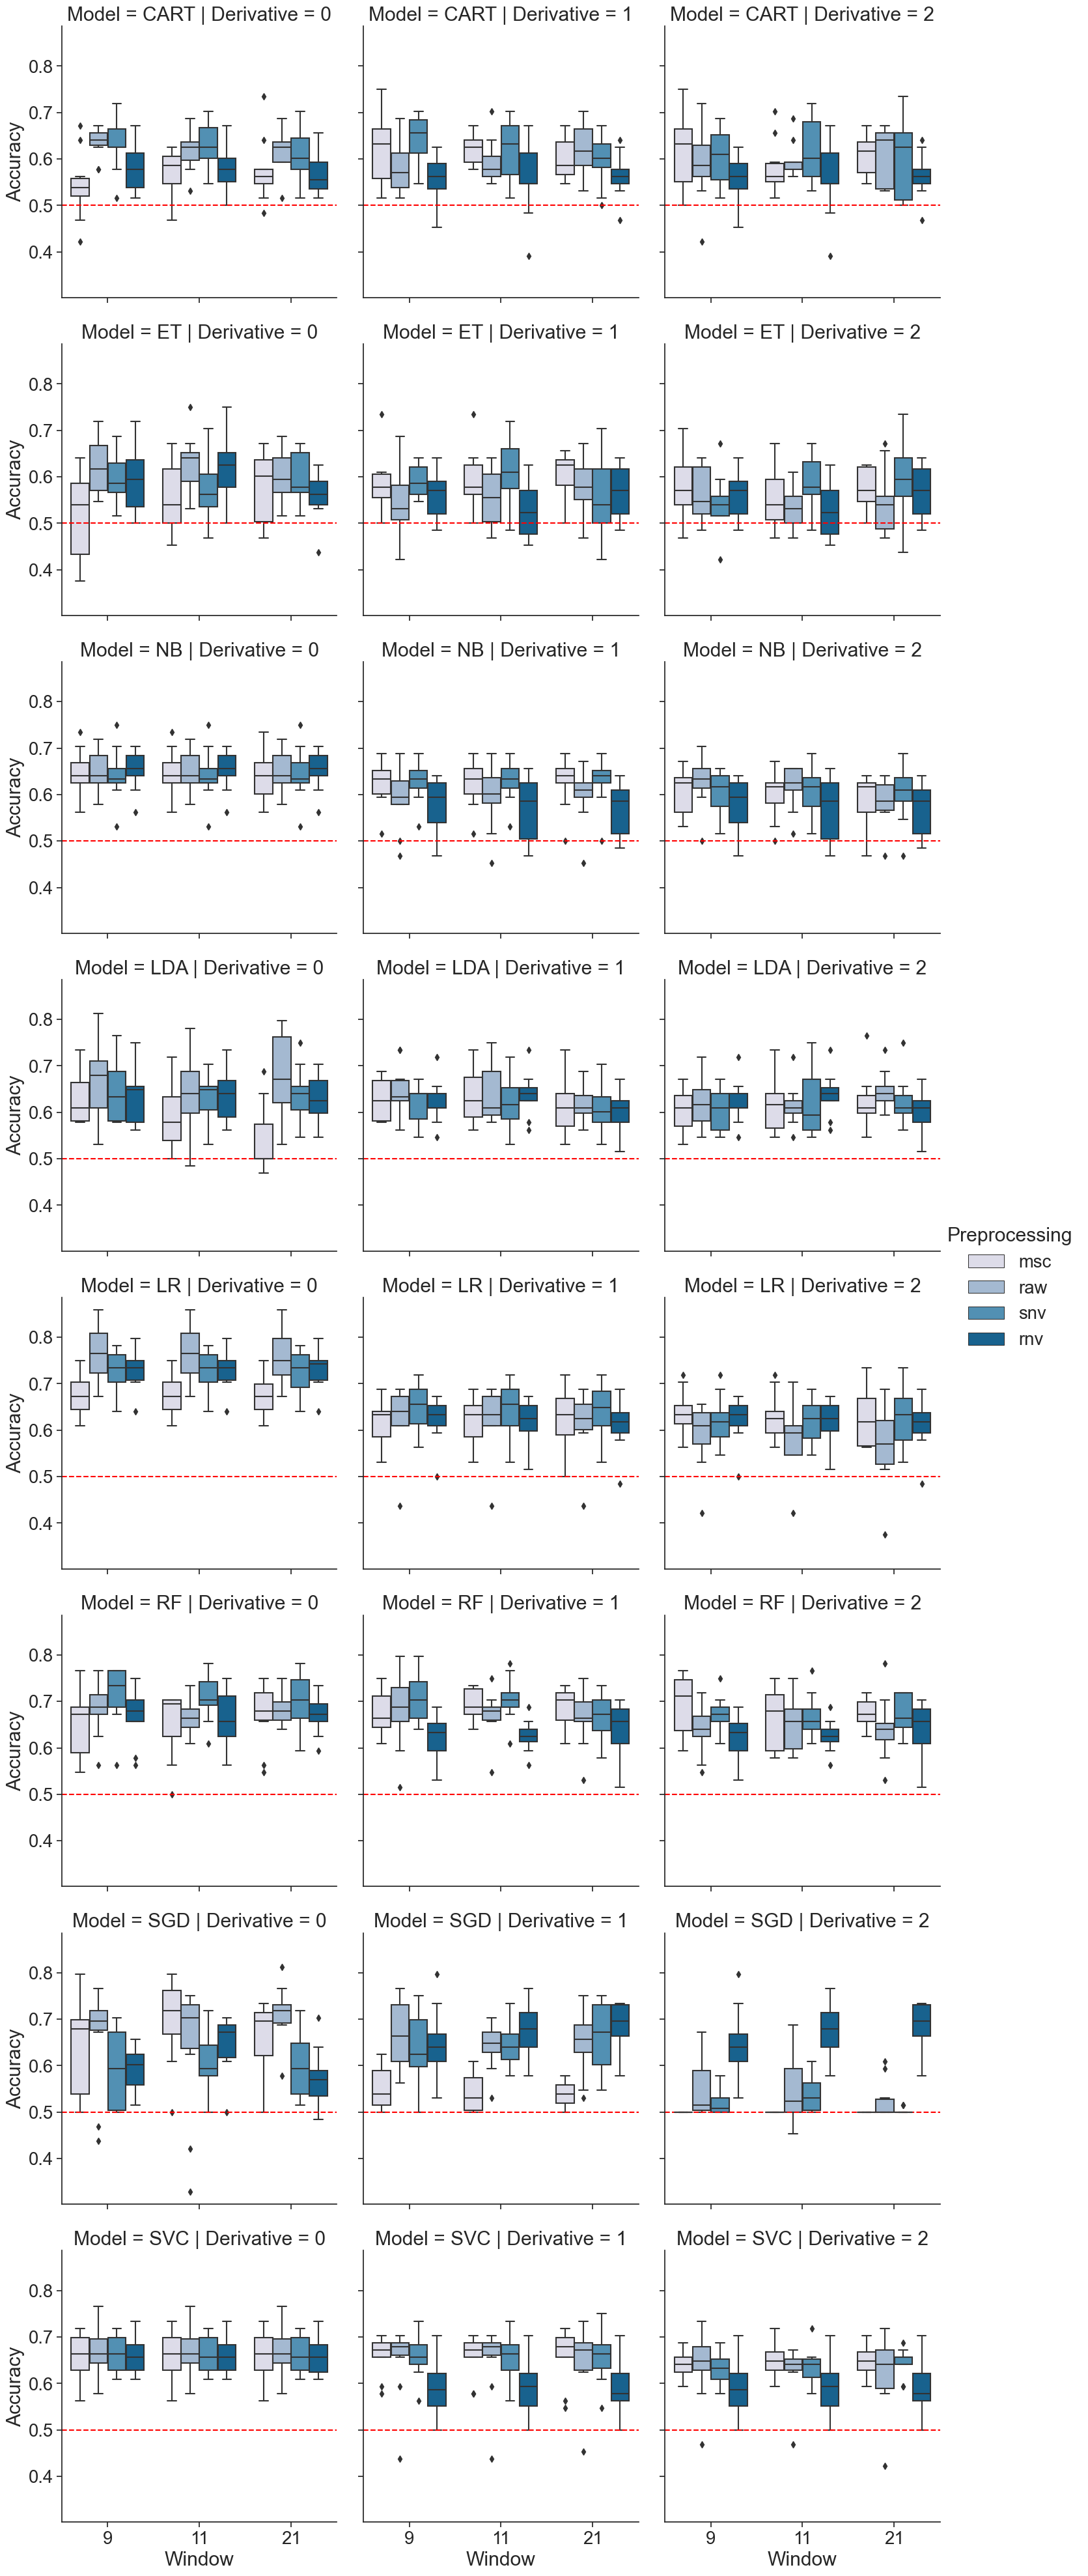

In [96]:
boxplot_preprocessing(preprocesing_final_results)

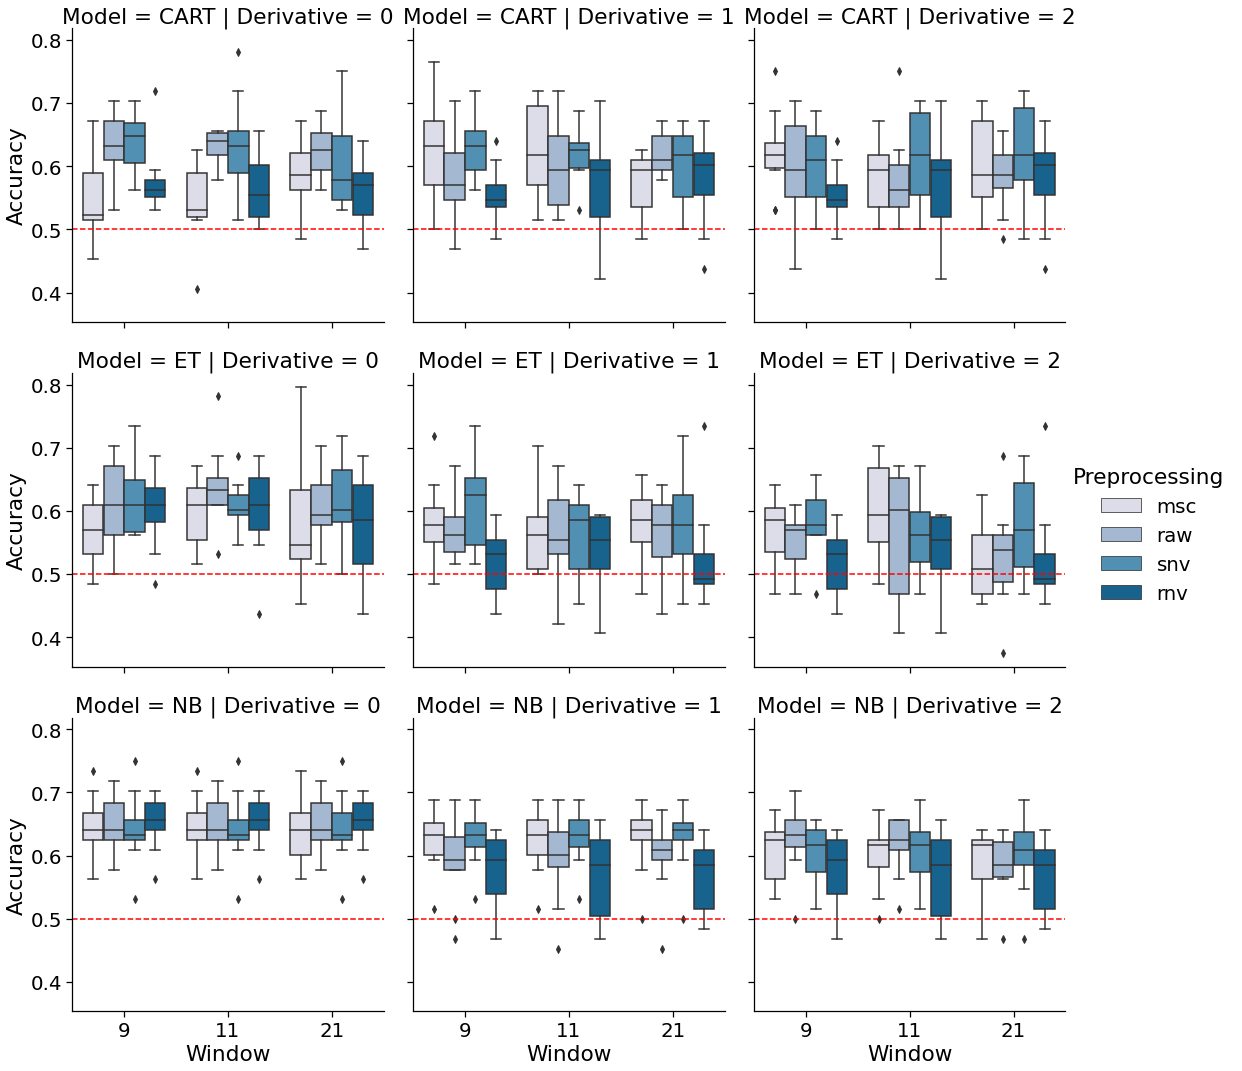

In [32]:
boxplot_preprocessing(preprocesing_final_results.loc[preprocesing_final_results['Model'].isin(['CART','ET', 'NB'])])

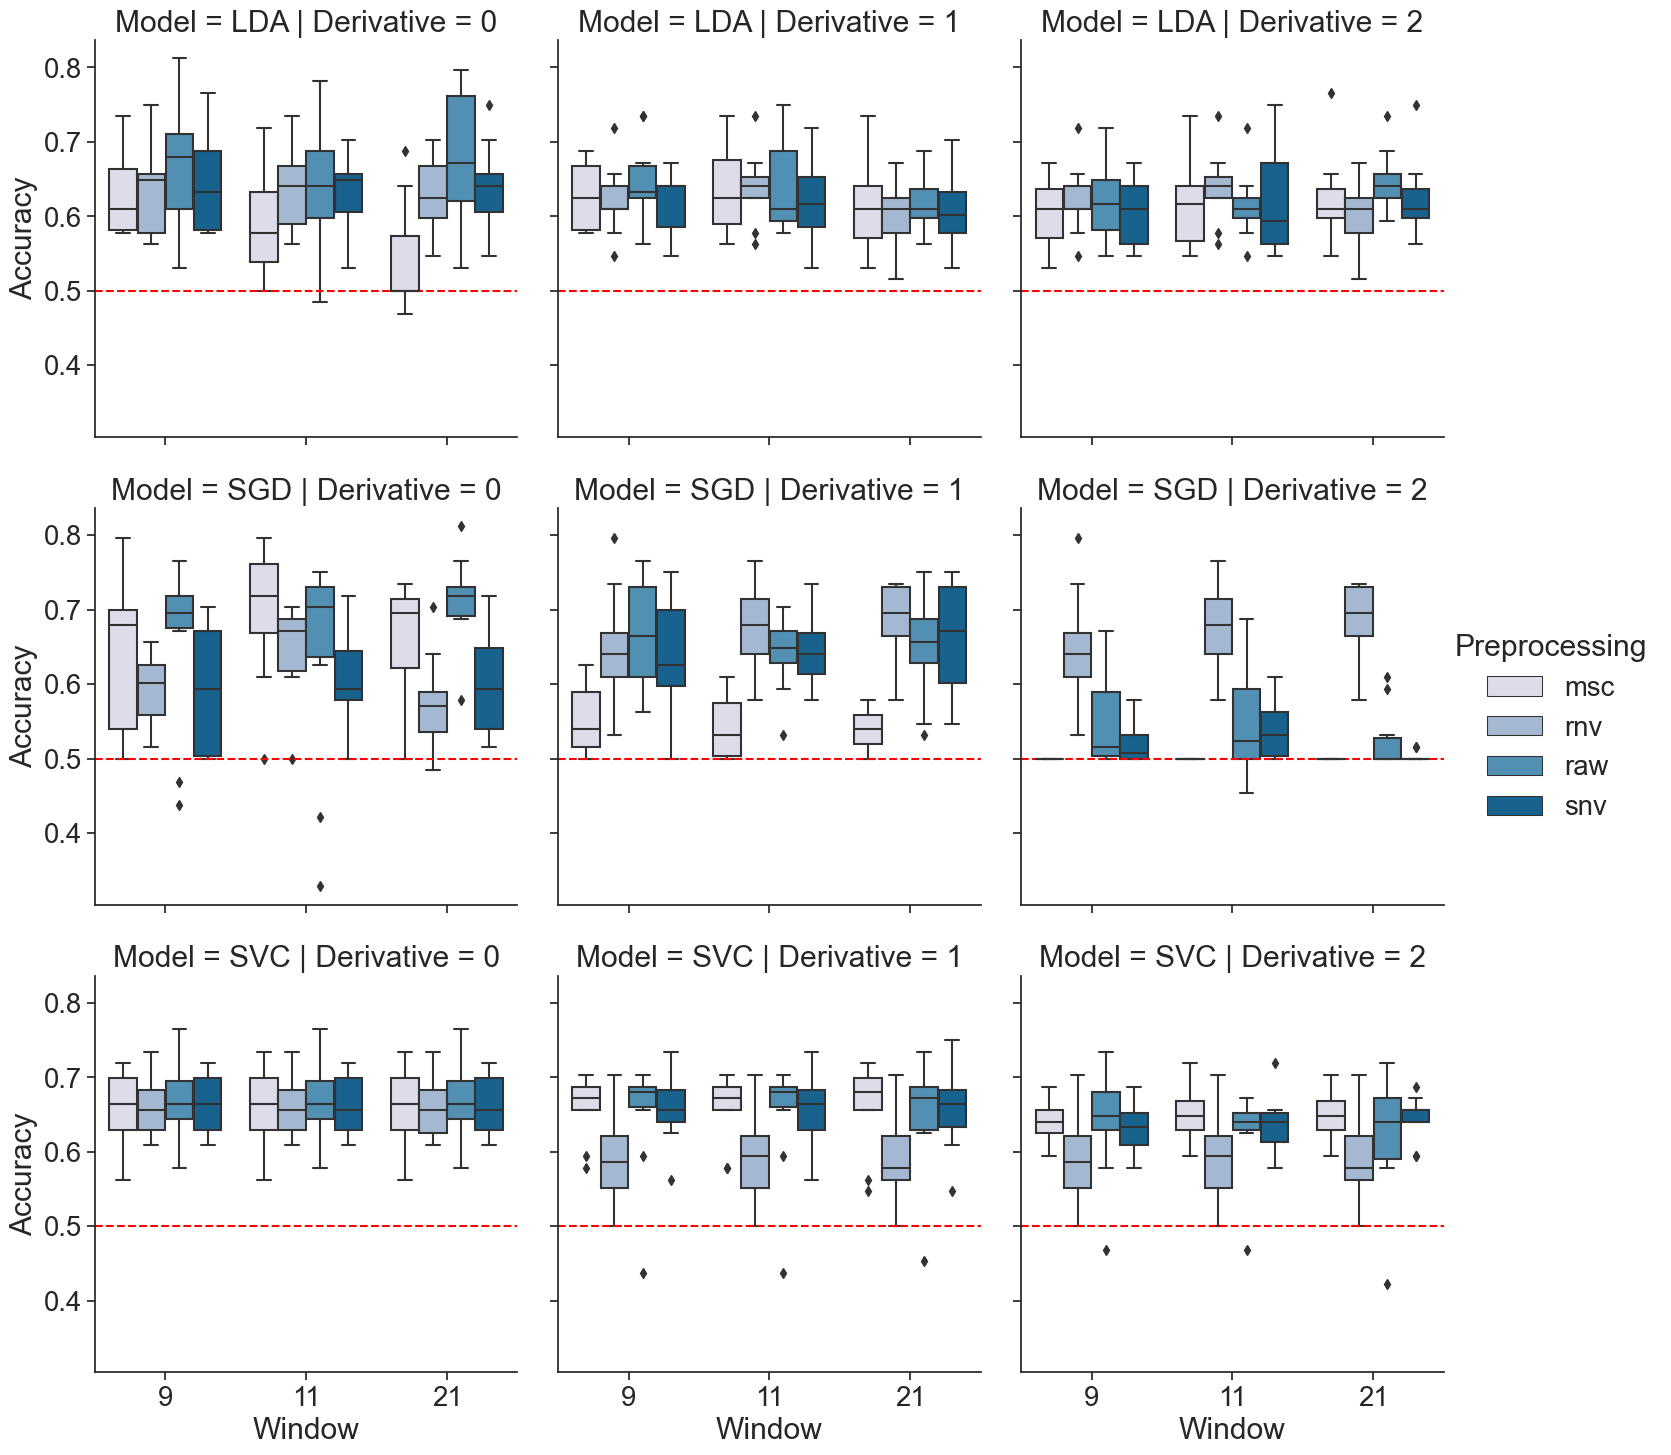

In [97]:
boxplot_preprocessing(preprocesing_final_results.loc[preprocesing_final_results['Model'].isin(['LDA','SVC', 'SGD'])])

In [135]:
# model optimization
optimization = model_optimization_LR(X_tr, y_tr)

Best parameter (CV score=0.702):
{'rf__C': 1000, 'rf__class_weight': {1: 0.4, 0: 0.6}, 'rf__penalty': 'l1', 'rf__solver': 'saga'}


In [141]:
# model evaluation

evaluation, y_pred, coefficients = model_evaluation(X_tr,y_tr,X_ts,y_ts)

In [142]:
evaluation

0.7777777777777778

In [143]:
y_ts_labeled = lb.inverse_transform(y_ts)
y_pred_labeled = lb.inverse_transform(y_pred)

              precision    recall  f1-score   support

 10 days old       0.80      0.74      0.77        27
  3 days old       0.76      0.81      0.79        27

    accuracy                           0.78        54
   macro avg       0.78      0.78      0.78        54
weighted avg       0.78      0.78      0.78        54



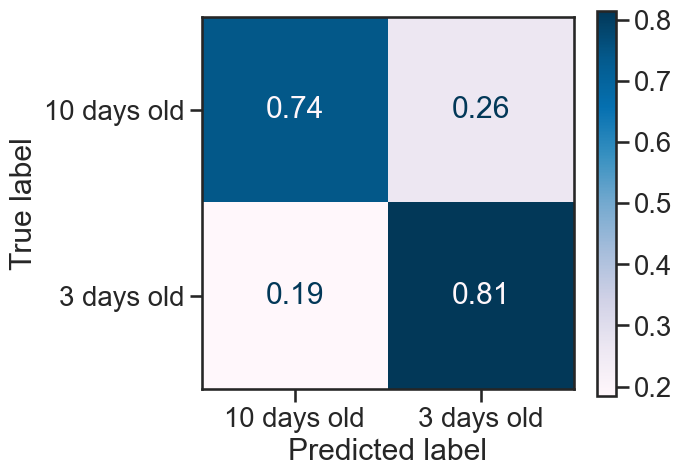

In [144]:
from optimization_evaluation_multi import confusion_matrix_multiclass
confusion_matrix_multiclass(y_ts_labeled, y_pred_labeled)

,Wavenumbers,Coefficients
67,1671,8.674700
66,1673,8.257919
68,1669,7.941579
328,1167,7.789532
91,1624,7.710353
327,1169,7.387198
90,1626,7.319889
92,1622,7.069333
192,1430,6.895786
65,1674,6.702950


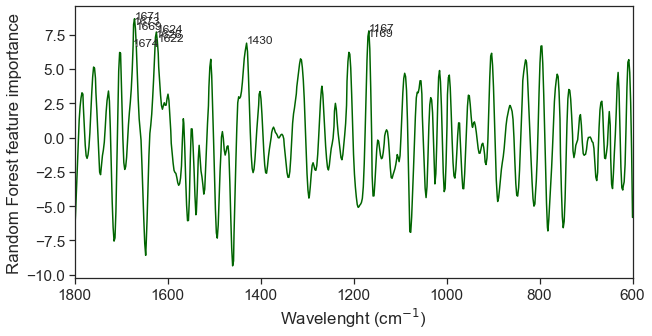

In [42]:
# model coefficients
from evaluation import wavenumberlist
from evaluation import variable_contribution_top10_plot

wavenumbers = wavenumberlist(X)

variable_importance_lr = pd.DataFrame()
variable_importance_lr['Wavenumbers'] = wavenumbers
variable_importance_lr['Coefficients'] = coefficients.T

variable_contribution_top10_plot(variable_importance_lr)


## Nested cross-validation

In [6]:
from matplotlib import pyplot as plt
from transformers import SavitzkyGolay
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [7]:
y_real = y_encoded.ravel()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>acc=0.704, est=0.826, cfg={'model__C': 100, 'model__penalty': 'l1'}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>acc=0.926, est=0.811, cfg={'model__C': 100, 'model__penalty': 'l2'}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>acc=0.704, est=0.862, cfg={'model__C': 100, 'model__penalty': 'l2'}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>acc=0.741, est=0.821, cfg={'model__C': 100, 'model__penalty': 'l2'}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>acc=0.704, est=0.823, cfg={'model__C': 100, 'model__penalty': 'l2'}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>acc=0.815, est=0.814, cfg={'model__C': 100, 'model__penalty': 'l2'}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>acc=0.769, est=0.819, cfg={'model__C': 100, 'model__penalty': 'l2'}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>acc=0.769, est=0.811, cfg={'model__C': 100, 'model__penalty': 'l2'}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>acc=0.769, est=0.845, cfg={'model__C': 100, 'model__penalty': 'l2'}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>acc=0.769, est=0.875, cfg={'model__C': 100, 'model__penalty': 'l2'}
Accuracy: 0.767 (0.063)


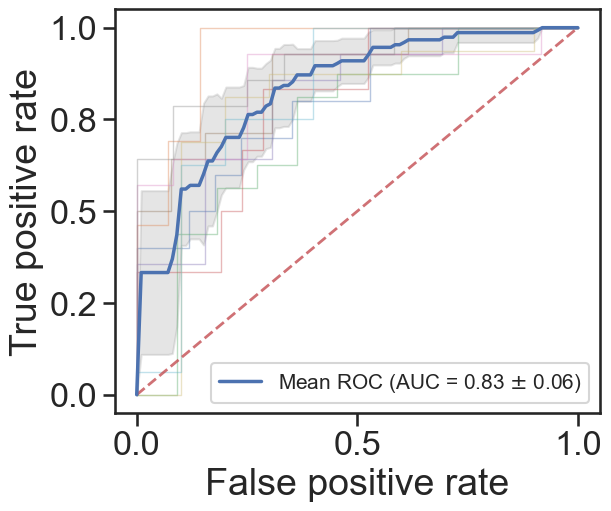

In [80]:
from evaluation import nested_crossvalidation
cm_nested = nested_crossvalidation(X, y_real)

In [43]:
np.sum(cm_nested,axis=0)

array([[100,  33],
       [ 29, 104]])

In [44]:
cm_nested

[array([[14,  3],
        [ 5,  5]]),
 array([[12,  2],
        [ 0, 13]]),
 array([[ 6,  5],
        [ 3, 13]]),
 array([[16,  5],
        [ 2,  4]]),
 array([[ 9,  4],
        [ 4, 10]]),
 array([[ 9,  4],
        [ 1, 13]]),
 array([[ 9,  3],
        [ 3, 11]]),
 array([[ 9,  3],
        [ 3, 11]]),
 array([[ 8,  2],
        [ 4, 12]]),
 array([[ 8,  2],
        [ 4, 12]])]

,Age
0,10 days old
1,10 days old
2,10 days old
3,10 days old
4,10 days old
...,...
261,3 days old
262,3 days old
263,3 days old
264,3 days old


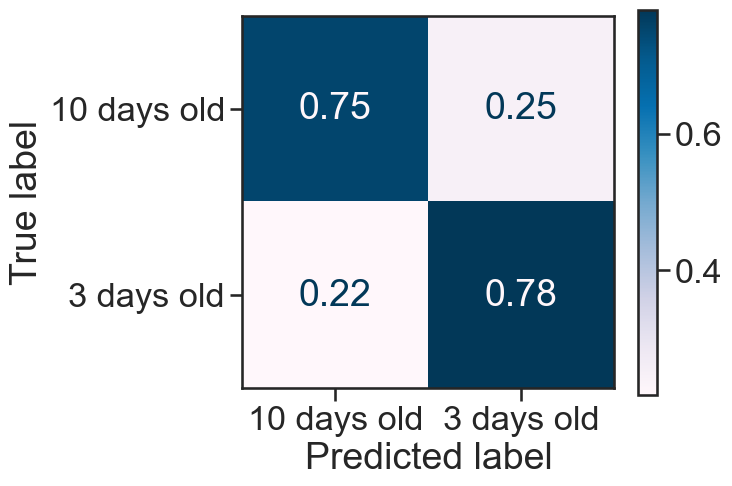

In [150]:
from optimization_evaluation_multi import confusion_matrix_nested

labels = ['10 days old','3 days old']
cm_nested_sum = np.sum(cm_nested,axis=0)
confusion_matrix_nested(cm_nested_sum, labels )
plt.savefig("/Users/mauropazmino/Documents/chapter_2/plots/confusion_matrix_nested_age.png", bbox_inches="tight",dpi=300)

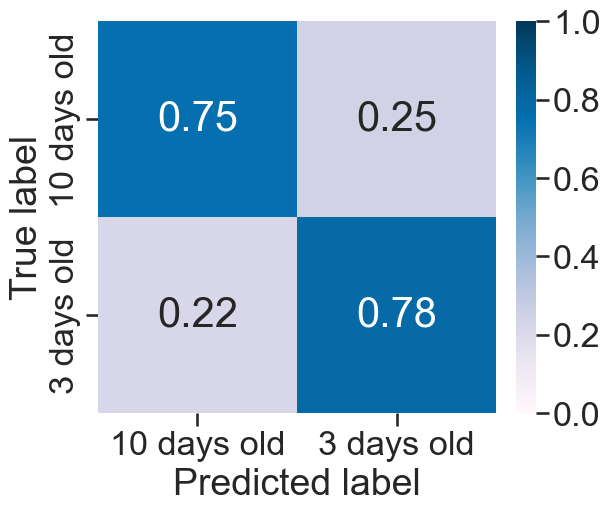

In [81]:
# sensitivity, specificity and precision

sensitivity = []
specificity = []
precision = []

for i in range(len(cm_nested)):
    TP = cm_nested[i][1][1]
    TN = cm_nested[i][0][0]
    FP = cm_nested[i][0][1]
    FN = cm_nested[i][1][0]
    sen = (TP / float(TP + FN))
    spe = (TN / float(TN + FP))
    prec = (TP / float(TP + FP))
    sensitivity.append(sen)
    specificity.append(spe)
    precision.append(prec)

print('Sensitivity: %.2f (%.2f)' % (np.mean(sensitivity), np.std(sensitivity)))
print('Specificity: %.2f (%.2f)' % (np.mean(specificity), np.std(specificity)))
print('Precision: %.2f (%.2f)' % (np.mean(precision), np.std(precision)))

Sensitivity: 0.77 (0.13)
Specificity: 0.75 (0.08)
Precision: 0.74 (0.12)
